In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH =  '/content/drive/MyDrive/AIConnect/NLP_classificaiton/data'

train = pd.read_csv(os.path.join(PATH, 'train.csv'), encoding='utf-8')
test = pd.read_csv(os.path.join(PATH, 'test.csv'), encoding='utf-8')

train.head(5)

,title,comment,bias,hate
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none


In [4]:
test.head(5)

,ID,title,comment
0,0,"류현경♥︎박성훈, 공개연애 4년차 애정전선 이상無..""의지 많이 된다""[종합]",둘다 넘 좋다~행복하세요
1,1,"""현금 유도+1인 1라면?""…'골목식당' 백종원, 초심 잃은 도시락집에 '경악' [종합]",근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데
2,2,"입대 D-11' 서은광의 슬픈 멜로디..비투비, 눈물의 첫 체조경기장[콘서트 종합]",누군데 얘네?
3,3,"아이콘택트' 리쌍 길, 3년 전 결혼설 부인한 이유 공개…""결혼,출산 숨겼다""","쑈 하지마라 짜식아!음주 1번은 실수, 2번은 고의, 3번은 인간쓰레기다.슬금슬금 ..."
4,4,"구하라, 안검하수 반박 해프닝...""당당하다""vs""그렇게까지"" 설전 [종합]",안검하수 가지고 있는 분께 희망을 주고 싶은건가요? 수술하면 이렇게 자연스러워진다고...


In [5]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8367 non-null   object
 1   comment  8367 non-null   object
 2   bias     8367 non-null   object
 3   hate     8367 non-null   object
dtypes: object(4)
memory usage: 261.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       511 non-null    int64 
 1   title    511 non-null    object
 2   comment  511 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.1+ KB
None


In [63]:
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)

Train Columns:  Index(['title', 'comment', 'bias', 'hate'], dtype='object')
Test Columns:  Index(['ID', 'title', 'comment'], dtype='object')


In [64]:
print('Train Null: ', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test.isnull().sum(), sep='\n')

Train Null: 
title      0
comment    0
bias       0
hate       0
dtype: int64

Test Null: 
ID         0
title      0
comment    0
dtype: int64


# bias 데이터 분포 확인

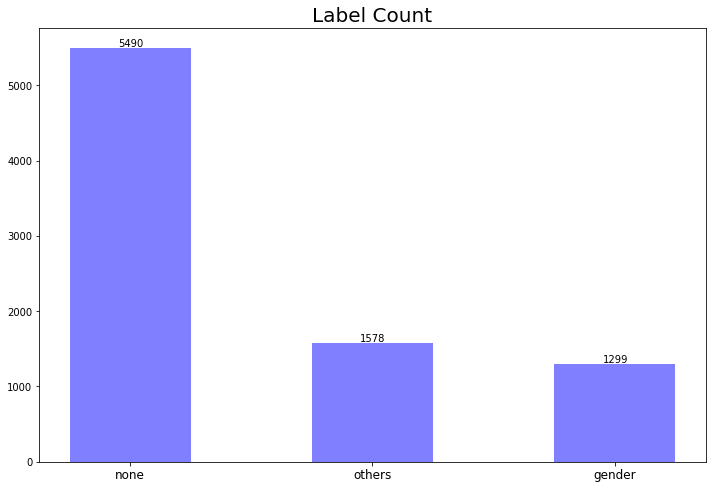

In [65]:
feature = train['bias']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# hate 데이터 분포 확인

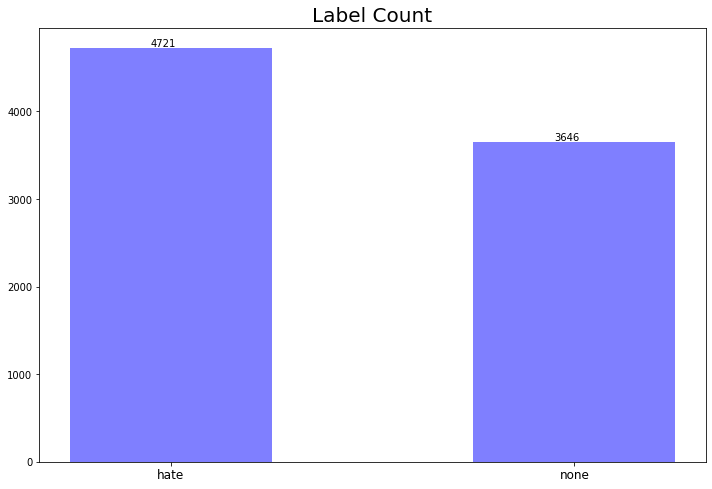

In [66]:
feature = train['hate']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# title, comment 길이 확인 (공백, 특수문자도 1개의 단위 길이로 측정됨)

In [67]:
max_len = np.max(train['title'].str.len())
min_len = np.min(train['title'].str.len())
mean_len = np.mean(train['title'].str.len())

print('Max title Length: ', max_len)
print('Min title Length: ', min_len)
print('Mean title Lenght: ', mean_len, '\n')

max_len = np.max(train['comment'].str.len())
min_len = np.min(train['comment'].str.len())
mean_len = np.mean(train['comment'].str.len())

print('Max comment	 Length: ', max_len)
print('Min comment	 Length: ', min_len)
print('Mean comment	 Lenght: ', mean_len)

Max title Length:  63
Min title Length:  2
Mean title Lenght:  42.4844030118322 

Max comment	 Length:  137
Min comment	 Length:  4
Mean comment	 Lenght:  38.72439345046014


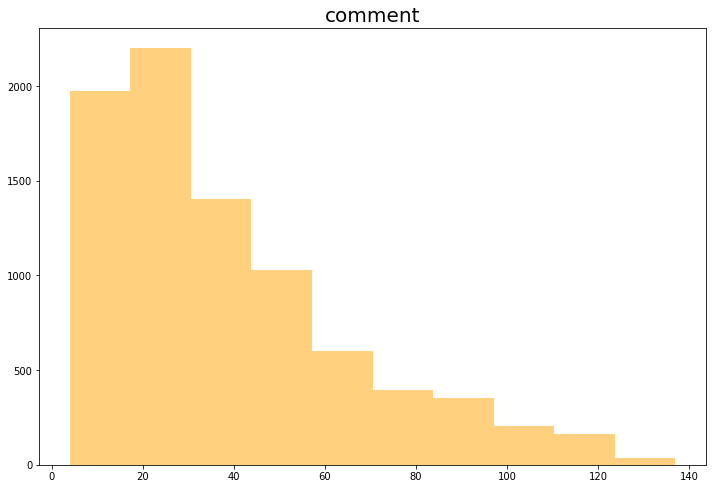

In [68]:
# comment 길이별 분포
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('comment', fontsize=20)

plt.hist(train['comment'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

# 토크나이징을 위한 데이터 전처리
soynlp emoji 라이브러리를 활용.
PLM 학습을 위해서 전처리를 진행한 과정은 다음과 같습니다.

한글 및 영어, 특수문자, 그리고 이모지(🥳)까지!

정규표현식을 통해 한글, 영어, 특수문자를 포함해 Emoji까지 학습 대상에 포함했습니다.

한편, 한글 범위를 ㄱ-ㅎ가-힣 으로 지정해 ㄱ-힣 내의 한자를 제외했습니다.

댓글 내 중복 문자열 축약

ㅋㅋㅋㅋㅋ와 같이 중복된 글자를 ㅋㅋ와 같은 것으로 합쳤습니다.

Cased Model

KcBERT는 영문에 대해서는 대소문자를 유지하는 Cased model입니다.

글자 단위 10글자 이하 제거

10글자 미만의 텍스트는 단일 단어로 이뤄진 경우가 많아 해당 부분을 제외했습니다.

중복 제거

중복적으로 쓰인 댓글을 제거하기 위해 완전히 일치하는 중복 댓글을 하나로 합쳤습니다.

OOO 제거

네이버 댓글의 경우, 비속어는 자체 필터링을 통해 OOO 로 표시합니다. 이 부분을 공백으로 제거하였습니다.

* 출처  
@misc{lee2021kcelectra,
  author = {Junbum Lee},
  title = {KcELECTRA: Korean comments ELECTRA},
  year = {2021},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\url{https://github.com/Beomi/KcELECTRA}}
}

In [6]:
!pip install soynlp emoji

In [13]:
# # 위 설명대로 데이터 전처리를 위한 함수 선언
# import re
# import emoji
# from soynlp.normalizer import repeat_normalize

# emojis = ''.join(emoji.UNICODE_EMOJI.keys())
# pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣{emojis}]+')
# url_pattern = re.compile(
#     r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

# def clean(x):
#     x = pattern.sub(' ', x)
#     x = url_pattern.sub('', x)
#     x = x.strip()
#     x = repeat_normalize(x, num_repeats=2)
#     return x

In [ ]:
# for i in range(len(train)):
#     train['title'][i] = clean(train['title'][i])
# train.tail(5)

In [ ]:
# for i in range(len(train)):
#     train['comment'][i] = clean(train['comment'][i])

# train.tail(5)

In [7]:
train['title'] = train['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['title'] = test['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,title,comment,bias,hate
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,섹션 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none
4,단독 임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면 인터뷰,난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none


In [102]:
train['comment'] = train['comment'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['comment'] = test['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,title,comment,bias,hate,label
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none,0
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길 행복은 머니순이 아니니깐 작은거에 감...,others,hate,3
3,섹션 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none,0
4,단독 임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면 인터뷰,난 절대로 임현주 욕하는인간이랑은 안논다,none,none,0


# bias, hate 조합으로 label column 생성

In [9]:
# 두 라벨의 가능한 모든 조합 만들기
combinations = np.array(np.meshgrid(train.bias.unique(), train.hate.unique())).T.reshape(-1,2)

print(combinations)

[['none' 'none']
 ['none' 'hate']
 ['others' 'none']
 ['others' 'hate']
 ['gender' 'none']
 ['gender' 'hate']]


In [10]:
# bias, hate 컬럼을 합친 것
bias_hate = list(np.array([train['bias'].values, train['hate'].values]).T.reshape(-1,2))

print(bias_hate[:5])


[array(['none', 'none'], dtype=object), array(['none', 'hate'], dtype=object), array(['others', 'hate'], dtype=object), array(['none', 'none'], dtype=object), array(['none', 'none'], dtype=object)]


In [11]:
labels = []
for i, arr in enumerate(bias_hate):
    for idx, elem in enumerate(combinations):
        if np.array_equal(elem, arr):
            labels.append(idx)

train['label'] = labels
train.head(5)

,title,comment,bias,hate,label
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none,0
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길 행복은 머니순이 아니니깐 작은거에 감...,others,hate,3
3,섹션 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none,0
4,단독 임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면 인터뷰,난 절대로 임현주 욕하는인간이랑은 안논다,none,none,0


# Modeling

In [12]:
!pip install transformers

In [13]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

In [14]:
# seed 고정, gpu 고정
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(2022)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Load Tokenizer, Model
Hugging Face Hub에 존재하는 Pretrained Tokenizer와 Model 및 Model Config 불러오기

이 때, Classification은 num_labels가 2로 Default되어있기 때문에 Model Config의 Parameter를  6으로 변경

In [86]:
모델 = 'beomi/KcELECTRA-base' # 보통 tokenizer도 같은거 씀. 이거만 바꾸면 모델, tokenizer 변경 가능.

In [87]:
MODEL_NAME = 모델

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 6 # 6 labels

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

loading configuration file https://huggingface.co/beomi/KcELECTRA-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/61dd2bdbb7e56ff51fdc66b6f0d1973d2d806cd616d38a149f1bfd2753babc3c.ba488f0d9624511a98ed83af3e8f6b33fe20b502e2cfb16ee9858a6b6f521982
Model config ElectraConfig {
  "_name_or_path": "beomi/KcELECTRA-base",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "tokenizer_class": "BertTokenizer",
  "tra

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(50135, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

# Tokenizing

In [88]:
train_dataset, eval_dataset = train_test_split(train, test_size=0.1, shuffle=True, stratify=train['label'])

tokenized_train = tokenizer(
    # list(train_dataset['title']),  
    list(train_dataset['comment']), # comment 만 학습에 사용하도록 title 제거
    return_tensors="pt",
    max_length=137, # Max_Length = 138  
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    # list(eval_dataset['title']),
    list(eval_dataset['comment']),
    return_tensors="pt",
    max_length=137,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

tensor([    2,  8103,  8439, 10706, 19402, 11385,  4071,  8291,  9144, 11417,
        12895,     3,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])
[CLS] 문재앙때문에 나라꼴 미쳐돌아가네요 탄핵만이 정답일듯 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [89]:
eval_dataset

,title,comment,bias,hate,label
3212,단독 구하라가 밝힌 그날 새벽폭언 폭행 그리고 협박인터뷰,발손무릎만 멍이 왜 생기냐ㅋㅋ 두들겨 패면 얼굴하고 배에 멍 생기지ㅋㅋㅋㅋ,none,hate,1
3158,8년째 연애 중인생술집 블락비 유권전선혜 4살차 연상연하 커플,인물은 참 없다,others,none,2
8309,누굴 더 닮았나동상이몽2 추자현우효광 아들 첫 공개,속에 화가 너무 많으신듯 아이도 생기고 부모가 되셧으니 서로 존중해주고 배려해주세요...,none,hate,1
135,종합구혜선 안재현 저격글 삭제신작 예약 판매 홍보 안주가 돌아오길,대한민국엔 2명의 부처가 산다 서장훈과 안재현 그들 덕분에 나라가 망하지 않고 유지...,none,none,0
3339,이혜원 딸 리원과 달달한 하교길 행복은 성적순이 아니야,막돼먹은영애씨 진짜 판박이,none,none,0
...,...,...,...,...,...
6595,캠핑클럽 소주파 이효리쫀디기파 성유리 각자의 취향,네명 다 매력 터지는데 옥주현 나올때더욱 집중된다,none,none,0
4054,놀면 뭐하니 첫방 유재석의 릴레이 예능신선함 나혼산 느낌,이걸 6회나 봐야한다니,none,none,0
5229,히든5 모창전쟁가고 듀엣쇼 온다전시즌 통튼 진검승부 예고어저께,아니아니 바다는왜그타임에나타나서 난리부르스야 의 입김이있었어 분명히 ㅠ 강타도그렇고...,others,hate,3
1706,동백꽃 필 무렵 손담비 지금까지 이런 캐릭터는 없었다,캐릭터는 좋은데 연기가 좀 아쉽던데,none,hate,1


In [90]:

class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)

In [91]:
# 원래는 문자열을 숫자로 바꿔서 label list에 담는건데 고장날까봐 그냥 사용함.
# 제대로 할거면 함수 지우고 label column 만 train_label 변수에 담으면 됨.
def label_to_num(label): 
    label_dict = {0 : 0, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5}  
    num_label = []

    for v in label: 
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_dataset['label'].values)
eval_label = label_to_num(eval_dataset['label'].values)

In [92]:
train_label[:5]

[3, 0, 0, 1, 1]

In [93]:
train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(7529))
print(tokenizer.decode(train_dataset.__getitem__(7529)['input_ids'])) # 메서드 호출하면 이렇게 생겼구나 ..

7530
{'input_ids': tensor([    2, 35960,  8726,  4013, 19894, 11138, 20125, 24620, 11445,  8184,
        28232,  8311, 33171, 19430, 15532, 14959,  4424,  4266,  4187, 15708,
            3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'label': tensor(0)}
[CLS] 양지원

In [94]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.
  f1 = f1_score(labels, preds, average='macro')
  return {
      'accuracy': acc,
      'f1_macro' : f1,
  }

In [97]:
training_ars = TrainingArguments(

    # 항상바꿔주자. checkpoint 마다 모델이 해당 경로에 저장됨.
    output_dir='/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01', 
    num_train_epochs=10,
    per_device_train_batch_size=16,
    save_total_limit=5, # 성능 상위 5개 모델만 저장.  이거 용량 꽤 커서 제한 해줘야댐.
    save_steps = 500,
    evaluation_strategy='steps',
    eval_steps = 500,
    load_best_model_at_end = True, # parameter들 의미를 정확히 모름 알아보고 바꿔주면 성능 올라갈듯.
    fp16 = True,

)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using amp half precision backend


In [98]:
trainer.train()
model.save_pretrained('/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/best_model')

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 7530
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4710


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
500,0.935600,0.987467,0.660693,0.424229
1000,0.640000,1.036650,0.670251,0.504104
1500,0.363500,1.310924,0.683393,0.498762
2000,0.222800,1.612875,0.670251,0.521986
2500,0.135700,1.837485,0.670251,0.528346
3000,0.071900,2.165821,0.673835,0.528333
3500,0.043300,2.360977,0.675030,0.559721
4000,0.021900,2.490931,0.675030,0.540441
4500,0.011100,2.539128,0.678614,0.541806


***** Running Evaluation *****
  Num examples = 837
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-500
Configuration saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 837
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-1000
Configuration saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-1000

# prediction 을 위해 저장된 모델 load

In [111]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = 모델
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)
  # checkpoint 마다 위에서 미리 지정해둔 경로에 모델 저장되어있음. 
MODEL_NAME = '/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/kcelectra01/checkpoint-4000'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading configuration file https://huggingface.co/beomi/KcELECTRA-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/61dd2bdbb7e56ff51fdc66b6f0d1973d2d806cd616d38a149f1bfd2753babc3c.ba488f0d9624511a98ed83af3e8f6b33fe20b502e2cfb16ee9858a6b6f521982
Model config ElectraConfig {
  "_name_or_path": "beomi/KcELECTRA-base",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "tokenizer_class": "BertTokenizer",
  "tra

PreTrainedTokenizerFast(name_or_path='beomi/KcELECTRA-base', vocab_size=50135, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [112]:
# test data에 label column을 추가해주자. test.csv 는 위에서 train 이랑 같이 불러왔음.
test['label'] = 0
test.tail(5)

,ID,title,comment,label
506,506,이슈 최율 조재현 성추행 의혹 폭로 소속사 상황 파악 중,얜 그냥 봐도 아니다 ㅋ 고소당하면 어마어마한 금액 물어줘야할껄,0
507,507,해투4 이서진 한지민 대본 리딩 격리설 해명날씨가 좋아서 컷,대박 게스트 꼭 봐야징 컨셉이 바뀌니깐 재미지넹,0
508,508,인터뷰박민영 김비서 행복했다열애설엔 당당미소였으니까,성형으로 다 뜯어고쳐놓고 예쁜척 성형 전 니 얼굴 다 알고있다 순자처럼 된장냄새나게...,0
509,509,이슈사실무근 캐슬 측 위올라이 표절설 부인여전히 핫종합,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,0
510,510,오창석 이채은 웨딩사진순백의 드레스 입고 활짝,입에 손가릭이 10개 있으니 징그럽다,0


In [114]:
test.tail(5)

,ID,title,comment,label
506,506,이슈 최율 조재현 성추행 의혹 폭로 소속사 상황 파악 중,얜 그냥 봐도 아니다 ㅋ 고소당하면 어마어마한 금액 물어줘야할껄,0
507,507,해투4 이서진 한지민 대본 리딩 격리설 해명날씨가 좋아서 컷,대박 게스트 꼭 봐야징 컨셉이 바뀌니깐 재미지넹,0
508,508,인터뷰박민영 김비서 행복했다열애설엔 당당미소였으니까,성형으로 다 뜯어고쳐놓고 예쁜척 성형 전 니 얼굴 다 알고있다 순자처럼 된장냄새나게...,0
509,509,이슈사실무근 캐슬 측 위올라이 표절설 부인여전히 핫종합,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,0
510,510,오창석 이채은 웨딩사진순백의 드레스 입고 활짝,입에 손가릭이 10개 있으니 징그럽다,0


In [115]:
# test data 도 tokenize 해주자.
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    # list(test['title']),
    list(test['comment']),
    return_tensors="pt",
    max_length=137,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(510))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

511
{'input_ids': tensor([    2, 11010,  2111,  4050,  5222,  4012,  8229,  4010,  8842, 23704,
            3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]), 'label': tensor(0)}
[CLS] 골목살리고 지가하는 체인점 다입점해서 때돈벌고 피디 술사주고 지가 음식점 체인사업을 때려쳐야 진정성이보이는거지 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [116]:
#test dataloader 선언
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

100%|██████████| 32/32 [00:01<00:00, 30.95it/s]

[0, 0, 1, 1, 1, 1, 1, 1, 5, 0, 1, 5, 0, 3, 0, 5, 1, 5, 2, 0, 5, 1, 1, 1, 0, 0, 5, 0, 0, 0, 3, 5, 1, 3, 0, 5, 1, 0, 0, 0, 5, 0, 3, 0, 0, 5, 1, 1, 0, 5, 2, 0, 3, 5, 0, 5, 5, 0, 0, 3, 1, 4, 0, 5, 1, 1, 1, 3, 0, 5, 0, 3, 1, 1, 5, 0, 5, 3, 5, 1, 1, 1, 3, 0, 1, 0, 1, 3, 5, 0, 0, 1, 1, 3, 1, 5, 1, 3, 0, 1, 0, 1, 3, 0, 5, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 3, 3, 0, 1, 0, 0, 0, 1, 3, 1, 1, 5, 5, 0, 4, 0, 1, 0, 5, 3, 0, 0, 0, 0, 1, 0, 1, 5, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 5, 5, 0, 5, 3, 0, 0, 0, 5, 0, 1, 3, 5, 0, 3, 5, 0, 5, 0, 0, 0, 5, 3, 5, 1, 5, 0, 0, 3, 5, 1, 3, 3, 0, 3, 0, 0, 1, 1, 3, 1, 0, 0, 5, 1, 3, 0, 5, 0, 5, 1, 5, 1, 0, 0, 1, 3, 3, 3, 0, 1, 0, 5, 4, 1, 1, 1, 0, 3, 0, 1, 1, 0, 3, 0, 3, 1, 5, 0, 0, 1, 3, 5, 0, 0, 0, 0, 5, 5, 5, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 5, 5, 1, 0, 1, 0, 3, 0, 1, 1, 1, 0, 3, 5, 0, 0, 0, 0, 3, 1, 1, 3, 0, 5, 5, 0, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0, 3, 1, 5, 1, 0, 0, 5, 4, 1, 5, 1, 0, 0, 1, 0, 1, 0, 3, 5, 5, 5, 1, 0, 5, 3, 1, 0, 1, 1, 0, 0, 3, 0, 0, 5, 1, 5, 0, 1, 

In [117]:
# 0-5 사이의 라벨 값 별로 bias, hate로 디코딩 하기 위한 딕셔너리
bias_dict = {0: 'none', 1: 'none', 2: 'others', 3:'others', 4:'gender', 5:'gender'}
hate_dict = {0: 'none', 1: 'hate', 2: 'none', 3:'hate', 4:'none', 5:'hate'}

# 인코딩 값으로 나온 타겟 변수를 디코딩
pred_bias = ['' for i in range(len(pred_answer))]
pred_hate = ['' for i in range(len(pred_answer))]

for idx, label in enumerate(pred_answer):
    pred_bias[idx]=(str(bias_dict[label]))
    pred_hate[idx]=(str(hate_dict[label]))
print('decode Completed!')

decode Completed!


In [118]:
print(pred_bias)

['none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'gender', 'none', 'none', 'gender', 'none', 'others', 'none', 'gender', 'none', 'gender', 'others', 'none', 'gender', 'none', 'none', 'none', 'none', 'none', 'gender', 'none', 'none', 'none', 'others', 'gender', 'none', 'others', 'none', 'gender', 'none', 'none', 'none', 'none', 'gender', 'none', 'others', 'none', 'none', 'gender', 'none', 'none', 'none', 'gender', 'others', 'none', 'others', 'gender', 'none', 'gender', 'gender', 'none', 'none', 'others', 'none', 'gender', 'none', 'gender', 'none', 'none', 'none', 'others', 'none', 'gender', 'none', 'others', 'none', 'none', 'gender', 'none', 'gender', 'others', 'gender', 'none', 'none', 'none', 'others', 'none', 'none', 'none', 'none', 'others', 'gender', 'none', 'none', 'none', 'none', 'others', 'none', 'gender', 'none', 'others', 'none', 'none', 'none', 'none', 'others', 'none', 'gender', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', '

In [119]:
# submission 파일 가져오기
submit = pd.read_csv('/content/drive/MyDrive/AIConnect/NLP_classificaiton/data/sample_submission.csv') 

# submission 에 prediction 값 넣기
submit['bias'] = pred_bias
submit['hate'] = pred_hate
submit.head(5)

,ID,bias,hate
0,0,none,none
1,1,none,none
2,2,none,hate
3,3,none,hate
4,4,none,hate


In [120]:
# 항상 바꿔주자. submit 저장경로.
submit.to_csv('/content/drive/MyDrive/AIConnect/NLP_classificaiton/mybaseline_submit10.csv', index=False)

In [121]:
submit.head(7) # 잘됐는지 확인

,ID,bias,hate
0,0,none,none
1,1,none,none
2,2,none,hate
3,3,none,hate
4,4,none,hate
5,5,none,hate
6,6,none,hate


# 제출하러가자 ㄱㄱㄱㄱ